### Описание задания:

Решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

### Этапы работы:

1) Сгенерируйте данные с помощью кода:

from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)

2) Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

3) Используйте статистические методы для отбора признаков:
**a)** Выберите признаки на основе матрицы корреляции.
**b)** Отсеките низковариативные признаки (VarianceThreshold).
**c)** Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4) Осуществите отбор признаков на основе дисперсионного анализа:
**a)** Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
**b)** Повторите п. 2 на отобранных признаках.

5) Отбор с использованием моделей:
**a)** Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
**b)** Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
**c)** Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6) Перебор признаков:
**a)** SequentialFeatureSelector.
**b)** Повторите п. 2 на отобранных признаках.

7) Сформулируйте выводы по проделанной работе:
**a)** Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

In [2]:
x_data_generated, y_data_generated = make_classification(scale=1, random_state=21)

In [3]:
x_data_generated.shape

(100, 20)

### Построение модели логистической регрессии и оценка её средней точности

In [4]:
start_score = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

In [5]:
print(f'Точность логистической модели до отбора признаков: {start_score}')

Точность логистической модели до отбора признаков: 0.8699999999999999


### Применение статистических методов для отбора признаков

In [6]:
X= pd.DataFrame(x_data_generated)
y = pd.DataFrame(y_data_generated)
y.rename(columns = {0: 'target'}, inplace=True)

In [7]:
data = pd.concat([X, y], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.243681,-0.741358,0.425711,-0.428871,-0.276152,-1.329505,-0.459959,-0.939565,0.894965,-0.110031,...,0.778004,0.317944,-1.477281,0.866248,0.129341,-0.311323,0.113319,1.909406,-0.357234,0
1,-1.912151,-0.154314,1.574628,-0.337113,-0.582975,2.769088,1.103170,0.499770,-1.271755,-0.304787,...,0.754238,1.291282,-0.641042,0.217301,0.767214,1.026366,2.237314,0.014093,-0.023359,1
2,-0.035207,1.167742,-0.386733,-0.265791,-1.785855,-0.097540,2.286585,0.578921,-2.163546,-0.054758,...,-0.286203,1.051316,0.599173,-1.013484,1.870989,-0.200244,-0.809731,1.039994,0.213523,1
3,0.175907,1.601370,0.783291,0.469106,-1.358661,0.788311,1.706317,0.266589,0.319325,-1.167448,...,-0.902779,0.431932,-1.576589,2.070489,1.497816,0.145904,-0.398443,-0.616374,0.140140,1
4,1.473317,0.045479,0.208450,-0.721527,-0.248335,-1.032652,1.026939,0.855676,1.205316,-0.697174,...,2.359001,1.677751,0.794636,0.989984,0.474320,-0.053593,0.927509,0.408340,1.619871,1


#### (a) Отбор на основе матрицы корреляции

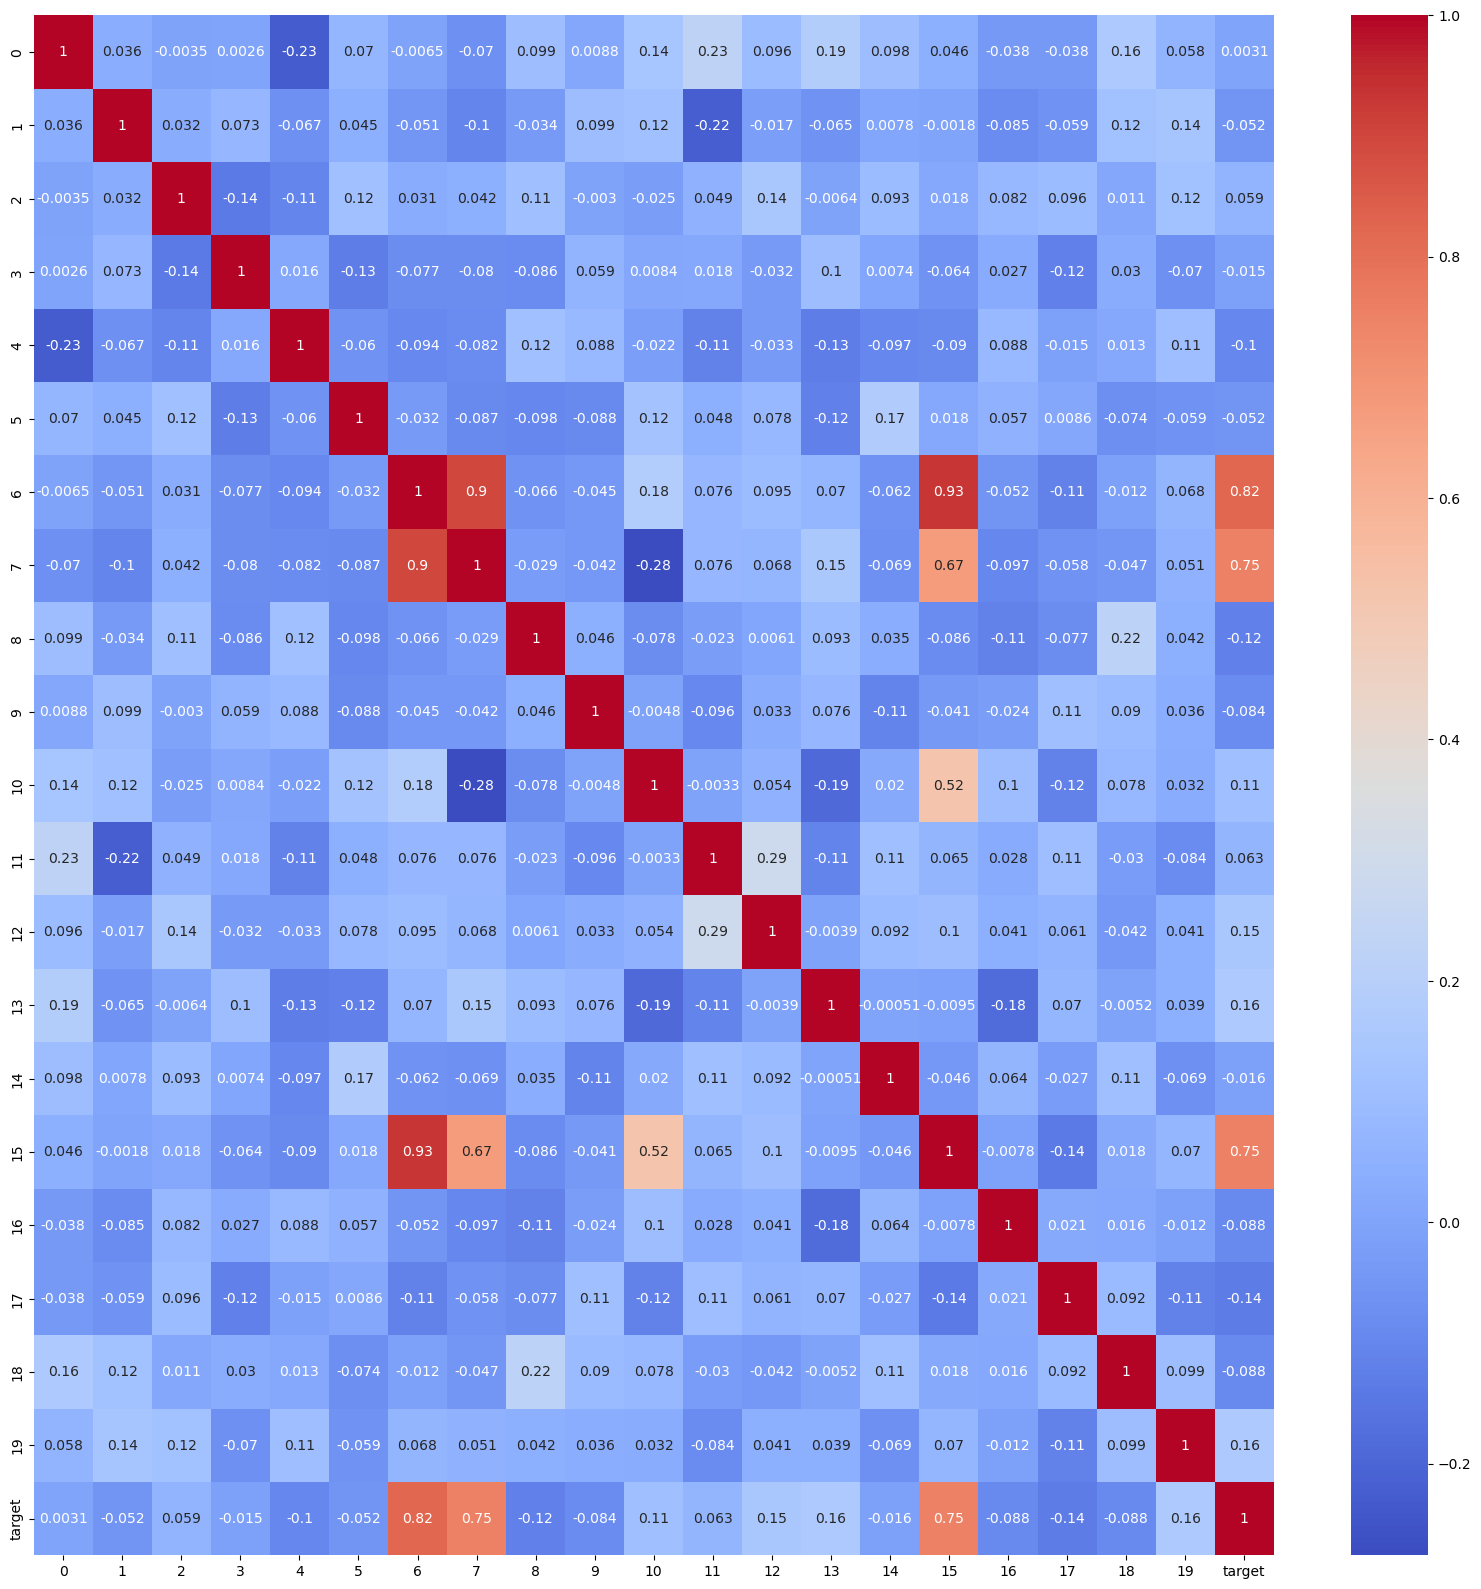

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

В моём случае у меня большая корреляция target и у признаков 6, 7, 15

In [9]:
X_corr = X[[6, 7, 15]]
X_corr.shape

(100, 3)

In [10]:
corr_score = cross_val_score(LogisticRegression(), X_corr.to_numpy(), y_data_generated, scoring='accuracy').mean()
print(f'Точность логистической модели отбора признаков по матрице корреляции: {corr_score}')

Точность логистической модели отбора признаков по матрице корреляции: 0.9099999999999999


**Вывод:** После удаления всех признаков, кроме трёх с высокой корреляцией, точность модели увеличилась.

#### (b) Отсечение низковариативных признаков (VarianceThreshold).

In [11]:
select = VarianceThreshold(threshold=0.25)
select.fit(X)
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

**Вывод:** Все признаки не являются низковариативными, поэтому оставляем их все

### Отбор признаков на основе дисперсионного анализа. Выбор 5 лучших признаков с помощью скоринговой функции для классификации

In [12]:
select = SelectKBest(k=5)
X_skbest = select.fit_transform(x_data_generated, y_data_generated)

In [13]:
X_skbest.shape

(100, 5)

In [14]:
skbest_score = cross_val_score(LogisticRegression(), X_skbest, y_data_generated, scoring='accuracy').mean()
print(f'Точность логистической модели отбора признаков после SelectKBest: {skbest_score}')

Точность логистической модели отбора признаков после SelectKBest: 0.9099999999999999


### Отбор с использованием моделей

In [15]:
import warnings
warnings.filterwarnings('ignore')

#### (a) Реализуовать отбор признаков с помощью логистической регрессии. Отобранные признаки подать далее на вход в саму логистическую регрессию (SelectFromModel). Использовать L1 регуляризацию

In [16]:
select = SelectFromModel(estimator=LogisticRegression(solver='saga', penalty='l1')).fit(X, y)

In [17]:
select.estimator_.coef_.reshape(-1,1)

array([[ 0.00000000e+00],
       [ 6.26184072e-02],
       [-1.39586511e-01],
       [-1.53416367e-04],
       [-1.01046685e-01],
       [-2.57519345e-01],
       [ 3.02104178e+00],
       [ 3.18016659e-01],
       [-4.26329503e-01],
       [-1.64158729e-01],
       [ 0.00000000e+00],
       [-1.96130429e-01],
       [ 3.92245413e-01],
       [ 4.22117169e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.57889574e-01],
       [-2.98793960e-01],
       [ 0.00000000e+00],
       [ 1.69964581e-01]])

In [18]:
X_l1 = X.drop(columns = [0, 1, 3, 10, 14, 15, 16, 17, 18])
X_l1.shape

(100, 11)

In [19]:
l1_score = cross_val_score(LogisticRegression(), X_l1, y_data_generated, scoring='accuracy').mean()
print(f'Точность логистической модели после отбора признаков на основе регуляризации L1: {l1_score}')

Точность логистической модели после отбора признаков на основе регуляризации L1: 0.9099999999999999


#### (b) Реализация отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance

In [20]:
model = RandomForestClassifier()
model.fit(X, y)
columns = X.columns.values
for i in range(len(columns)):
    print(f"{columns[i]}\t- {model.feature_importances_[i]:.4f}")

0	- 0.0062
1	- 0.0231
2	- 0.0141
3	- 0.0141
4	- 0.0137
5	- 0.0199
6	- 0.3459
7	- 0.1917
8	- 0.0206
9	- 0.0135
10	- 0.0228
11	- 0.0138
12	- 0.0171
13	- 0.0278
14	- 0.0209
15	- 0.1621
16	- 0.0183
17	- 0.0236
18	- 0.0146
19	- 0.0161


In [21]:
X_rf = X[[6, 7, 15]]

In [22]:
rf_score = cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='accuracy').mean()
print(f'Точность логистической модели после отбора признаков на основе модели RandomForest: {rf_score}')

Точность логистической модели после отбора признаков на основе модели RandomForest: 0.9099999999999999


### Перебор признаков с помощью SequentialFeatureSelector

In [25]:
model = SequentialFeatureSelector(LogisticRegression(), n_features_to_select = 3)
model.fit(X, y)
X_sfs = model.transform(X)
X_sfs.shape

(100, 3)

In [26]:
sfs_score = cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='accuracy').mean()
print(f'Точность логистической модели после отбора признаков с помощью SequentialFeatureSelector: {sfs_score}')

Точность логистической модели после отбора признаков с помощью SequentialFeatureSelector: 0.9400000000000001


### Вывод:

Были на практике применены различные способы feature selection. В результате были получены следующие результаты:

- LogisticRegression - 20 признаков - средняя точность 0.87

- Отбор признаков на основе матрицы корреляции + VarianceThreshold - 3 признака - средняя точность 0.91

- SelectKBest(f_classif, k=5) - 5 признаков - средняя точность 0.91

- SelectFromModel - 11 признаков - средняя точность 0.91

- RandomForestClassifier - 3 признака - средняя точность 0.91

- SequentialFeatureSelector - 3 признака - средняя точность 0.94

Самый лучший результат показал отбор признаков с помощью SequentialFeatureSelector